In [41]:
# Import the pandas library
import pandas as pd

# Define the path to your dataset
file_path = 'datasets/blood_demand_mock_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the data
df.head()

,Date,City,BloodType,UnitsRequested,EmergencyLevel,Hospital
0,2024-12-11,Hubballi,A-,13,Medium,SDM Hospital
1,2025-04-11,Hubballi,A+,2,High,SDM Hospital
2,2025-06-04,Hubballi,A-,15,Low,SDM Hospital
3,2025-02-09,Belagavi,AB+,11,High,Lakeview Hospital
4,2025-05-29,Hubballi,A+,5,Medium,KIMS Hubli


In [42]:
# Get a technical summary of the data (column names, data types, null values)
print("--- Data Info ---")
df.info()

print("\n" + "="*30 + "\n") # A separator for cleaner output

# Get a statistical summary of the numerical columns
print("--- Statistical Summary ---")
df.describe()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            200 non-null    object
 1   City            200 non-null    object
 2   BloodType       200 non-null    object
 3   UnitsRequested  200 non-null    int64 
 4   EmergencyLevel  200 non-null    object
 5   Hospital        200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


--- Statistical Summary ---


,UnitsRequested
count,200.000000
mean,7.920000
std,4.308878
min,1.000000
25%,4.000000
50%,8.000000
75%,12.000000
max,15.000000


In [43]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Run df.info() again to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            200 non-null    datetime64[ns]
 1   City            200 non-null    object        
 2   BloodType       200 non-null    object        
 3   UnitsRequested  200 non-null    int64         
 4   EmergencyLevel  200 non-null    object        
 5   Hospital        200 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.5+ KB


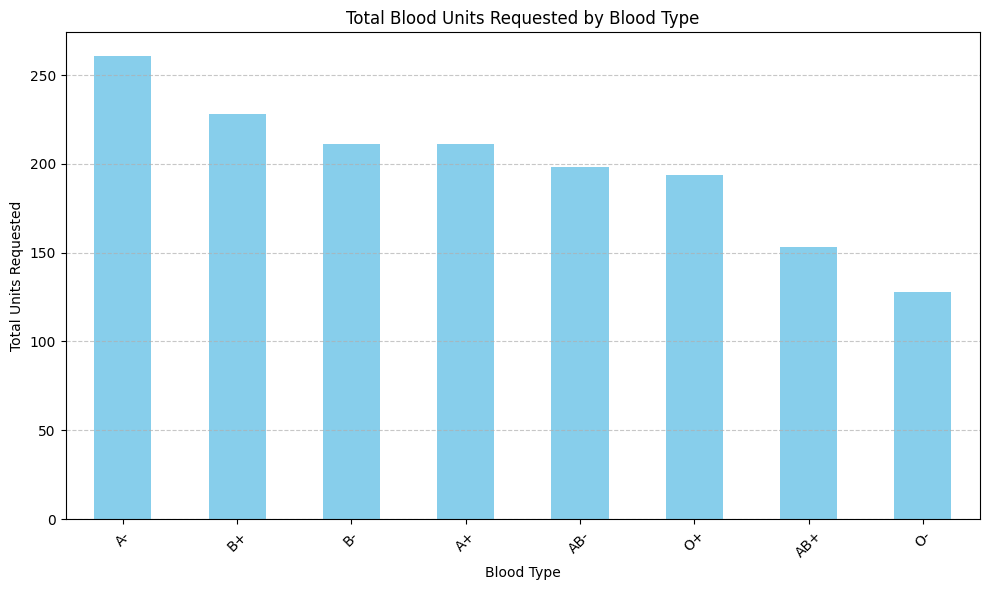

In [44]:
import matplotlib.pyplot as plt

# Group data by blood type and sum the units requested
blood_demand = df.groupby('BloodType')['UnitsRequested'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjusts the size of the plot for better readability
blood_demand.plot(kind='bar', color='skyblue')

# Add titles and labels for clarity
plt.title('Total Blood Units Requested by Blood Type')
plt.ylabel('Total Units Requested')
plt.xlabel('Blood Type')
plt.xticks(rotation=45) # Rotates the x-axis labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adds a faint grid line
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping

# Display the plot
plt.show()

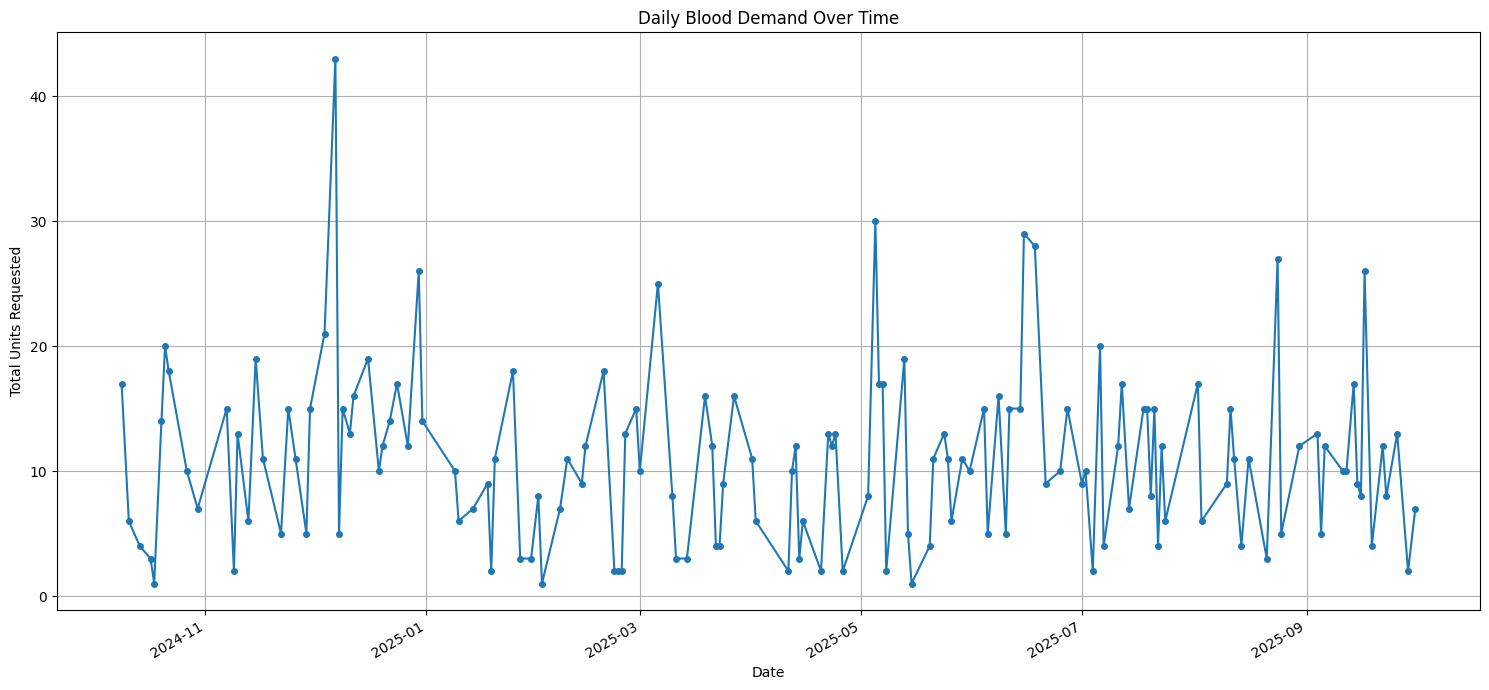

In [45]:
# Group data by Date and sum the units requested for each day
daily_demand = df.groupby('Date')['UnitsRequested'].sum()

# Create the line plot
plt.figure(figsize=(15, 7)) # A wider plot is better for time-series data
daily_demand.plot(kind='line', marker='o', linestyle='-', markersize=4)

# Add titles and labels
plt.title('Daily Blood Demand Over Time')
plt.ylabel('Total Units Requested')
plt.xlabel('Date')
plt.grid(True) # Adds a grid for easier reading
plt.tight_layout()

# Display the plot
plt.show()

In [46]:
# --- Feature Engineering ---

# Extract features from the 'Date' column
df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year

# Now, we will drop the original Date column as we have extracted the useful information
# We will also drop other non-numerical columns for this simple model
features_df = df.drop(['Date', 'City', 'EmergencyLevel', 'Hospital', 'BloodType'], axis=1)


# Display the first 5 rows of our new features DataFrame
print("Data ready for the model:")
features_df.head()

Data ready for the model:


,UnitsRequested,day_of_week,month,day,year
0,13,2,12,11,2024
1,2,4,4,11,2025
2,15,2,6,4,2025
3,11,6,2,9,2025
4,5,3,5,29,2025


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Define Features (X) and Target (y)
# X contains all the columns we use for prediction
X = features_df.drop('UnitsRequested', axis=1) 
# y is the single column we want to predict
y = features_df['UnitsRequested']

# 2. Split the Data into Training and Testing Sets
# 80% of data will be for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

# 4. Evaluate the Model
# Make predictions on the test data (the data the model has never seen)
predictions = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("This means, on average, our model's prediction is off by about", round(mae, 2), "units.")

✅ Model trained successfully!

--- Model Evaluation ---
Mean Absolute Error (MAE): 3.53
This means, on average, our model's prediction is off by about 3.53 units.


In [48]:
import joblib

# Define the filename for your model
model_filename = 'model.pkl'

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"✅ Model saved successfully as '{model_filename}'")

✅ Model saved successfully as 'model.pkl'
